# Deskripsi
Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

## Langkah 1 - Import Library


In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data
Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.



### Langkah 2.1. Pra Pengolahan Data Training


In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN


### Langkah 3.1.  - Inisiasi Model CNN


In [4]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1


In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Langkah 3.3 - Pembuatan Layer Pooling 1


In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening


In [8]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)


In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)


In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN


In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 4 - Fit CNN


In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 69s 241ms/step - loss: 0.6863 - accuracy: 0.5526 - val_loss: 0.6690 - val_accuracy: 0.5935
Epoch 2/25
250/250 [==============================] - 16s 62ms/step - loss: 0.6455 - accuracy: 0.6339 - val_loss: 0.6185 - val_accuracy: 0.6735
Epoch 3/25
250/250 [==============================] - 13s 53ms/step - loss: 0.5995 - accuracy: 0.6783 - val_loss: 0.5755 - val_accuracy: 0.6960
Epoch 4/25
250/250 [==============================] - 13s 51ms/step - loss: 0.5607 - accuracy: 0.7081 - val_loss: 0.5664 - val_accuracy: 0.7125
Epoch 5/25
250/250 [==============================] - 13s 52ms/step - loss: 0.5332 - accuracy: 0.7370 - val_loss: 0.5789 - val_accuracy: 0.7025
Epoch 6/25
250/250 [==============================] - 13s 53ms/step - loss: 0.5234 - accuracy: 0.7415 - val_loss: 0.5269 - val_accuracy: 0.7405
Epoch 7/25
250/250 [==============================] - 13s 54ms/step - loss: 0.4915 - accuracy: 0.7596 - val_loss: 0.5216 - val_accuracy

## Langkah 5 - Prediksi dengan 1 Citra
Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.



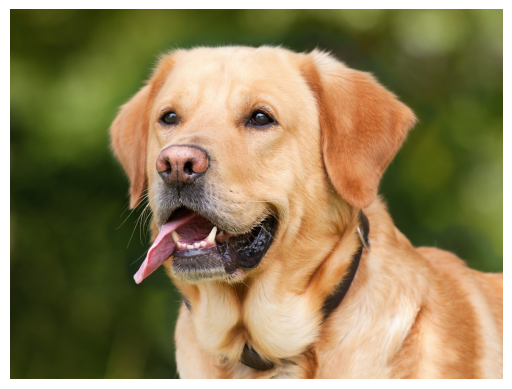

NameError: name 'cnn' is not defined

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Memuat dan memproses gambar
test_image_path = 'dataset/single_prediction/cat_or_dog_1.jpg'
test_image = load_img(test_image_path, target_size=(64, 64))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Menampilkan gambar
plt.imshow(load_img(test_image_path))
plt.axis('off')
plt.show()

# Melakukan prediksi
result = cnn.predict(test_image_array)

# Menampilkan hasil prediksi
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)